# Solution of 5.9.2, Map of Science 
### Read the file `pubmed_results.txt`, and extract all the US ZIP codes.

First, import the modules we'll need.

In [261]:
import re
import csv

Now read the whole file, and store it into a string.

In [262]:
with open("pubmed-beard-set.txt", encoding="utf8") as f1:
    my_text = f1.read()

In [263]:
len(my_text)

21840132

Note that the zipcode could be broken over two lines, as in line 43 of `pubmed_results.txt`

```
AD  - Biological and Biomedical Sciences Program, Harvard Medical School, Boston, MA
      02115, USA. Department of Genetics, Harvard Medical School, Boston, MA 02115,
      USA.
```

To avoid problems, replace each newline followed by 6 spaces with a single space.

In [264]:
my_text = re.sub(r'\n\s{6}', ' ', my_text)

We should now have every entry in a single line. Let's look at part of an entry:

In [265]:
print(my_text[:2000])

PMID- 32312510
OWN - NLM
STAT- MEDLINE
DCOM- 20210127
LR  - 20210127
IS  - 1558-1926 (Electronic)
IS  - 1064-7406 (Linking)
VI  - 28
IP  - 2
DP  - 2020 May
TI  - Beard Hair Transplantation.
PG  - 237-241
LID - S1064-7406(20)30011-0 [pii]
LID - 10.1016/j.fsc.2020.01.010 [doi]
AB  - In the field of hair restoration, there has been a significant increase in demand  with patients for facial hair transplantation procedures. Modern techniques in hair  transplantation allow for facial hair transplantation and for the attainment of  natural-appearing results. Facial hair transplantation is a subspecialty within hair  restoration with many gratifying benefits for the patients as well as for the hair  restoration surgeon. Adapting these advanced techniques into a hair restoration  practice allows a surgeon to offer their patients these procedures and provides an  expanded artistic element to a hair restoration surgeon's practice.
CI  - Copyright © 2020 Elsevier Inc. All rights reserved.
FAU - Ba

Now write a regular expression that creates a list of zipcodes:

In [266]:
Rexs = re.findall(r'[A-Z]{2}\s(\d{5}), USA', my_text)


The anatomy of the regular expression:
```
[A-Z]{2}  -> two capital letters (for the state)
\s -> followed by a space
\d{5} -> followed by exactly 5 digits
, USA -> follwed by the string ", USA"
```
Note that we use a group `(\d{5})` to capture exclusively the zipcode proper.

In [267]:
len(Rexs)

909

In [268]:
Rexs[:10]

['67214',
 '33143',
 '10021',
 '38138',
 '80521',
 '66045',
 '27709',
 '30341',
 '80262',
 '66506']

Extract the unique zipcodes 

In [269]:
unique_Rexs = list(set(Rexs))

In [270]:
unique_Rexs.sort()

In [271]:
unique_Rexs[:10]

['01003',
 '01605',
 '01610',
 '01730',
 '02114',
 '02115',
 '02118',
 '02138',
 '02139',
 '02141']

In [272]:
len(unique_Rexs)

241

Now create a dictionary with the latitude and longitude for each zipcode:

In [273]:
#Diccionario con codigo postal  de latitud y longitud
coordinates = {}
with open('cordenadas.csv') as f:
    csvr = csv.DictReader(f)
    for row in csvr:
        zip_coordinates[row['ZIP']] = [float(row['LAT']), 
                                       float(row['LNG'])]

### Create the lists `zip_code`, containing the ZIP codes, `zip_long`, `zip_lat`, and `zip_count`, containing the unique ZIP codes, their longitude, latitude, and count (number of occurrences in Science), respectively.

In [274]:
#Lista de información para graficar
code = []
long = []
lat = []
count = [] #Veces publicadas en cada pais

Populate the lists:

In [275]:
#Repetición de proceso por cada codigo postal
for peche in unique_Rexs:
    # if we can find the coordinates
    if peche in coordinates.keys():
        code.append(peche)
        lat.append(coordinates[peche][0])
        long.append(coordinates[peche][1])
        contador.append(Rexs.count(peche))

### Plot the results using the following code:

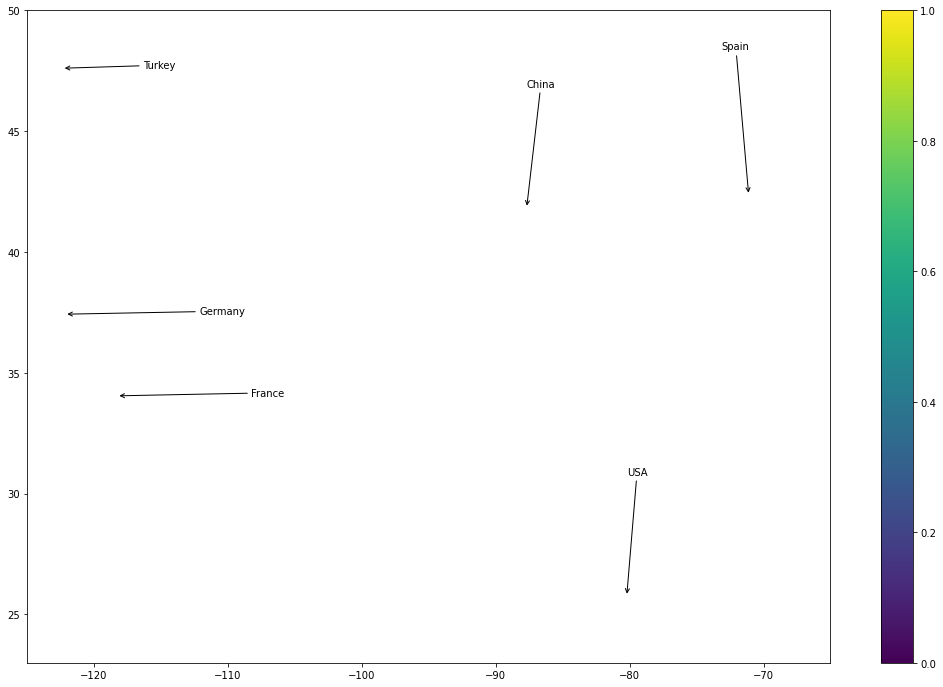

In [259]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(zip_long, zip_lat, s = zip_count, c= zip_count)
plt.colorbar()
# only continental us without Alaska
plt.xlim(-125,-65)
plt.ylim(23, 50)
# add a few cities for reference (optional)
ard = dict(arrowstyle="->")
plt.annotate('France', xy = (-118.25, 34.05), 
               xytext = (-108.25, 34.05), arrowprops = ard)
plt.annotate('Germany', xy = (-122.1381, 37.4292), 
               xytext = (-112.1381, 37.4292), arrowprops= ard)
plt.annotate('Spain', xy = (-71.1106, 42.3736), 
               xytext = (-73.1106, 48.3736), arrowprops= ard)
plt.annotate('China', xy = (-87.6847, 41.8369), 
               xytext = (-87.6847, 46.8369), arrowprops= ard)
plt.annotate('Turkey', xy = (-122.33, 47.61), 
               xytext = (-116.33, 47.61), arrowprops= ard)
plt.annotate('USA', xy = (-80.21, 25.7753), 
               xytext = (-80.21, 30.7753), arrowprops= ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show()